In [6]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
files.upload()

Saving food_consumption.csv to food_consumption.csv


{'food_consumption.csv': b'"","country","food_category","consumption","co2_emission"\n"1","Argentina","pork",10.51,37.2\n"2","Argentina","poultry",38.66,41.53\n"3","Argentina","beef",55.48,1712\n"4","Argentina","lamb_goat",1.56,54.63\n"5","Argentina","fish",4.36,6.96\n"6","Argentina","eggs",11.39,10.46\n"7","Argentina","dairy",195.08,277.87\n"8","Argentina","wheat",103.11,19.66\n"9","Argentina","rice",8.77,11.22\n"10","Argentina","soybeans",0,0\n"11","Argentina","nuts",0.49,0.87\n"12","Australia","pork",24.14,85.44\n"13","Australia","poultry",46.12,49.54\n"14","Australia","beef",33.86,1044.85\n"15","Australia","lamb_goat",9.87,345.65\n"16","Australia","fish",17.69,28.25\n"17","Australia","eggs",8.51,7.82\n"18","Australia","dairy",234.49,334.01\n"19","Australia","wheat",70.46,13.44\n"20","Australia","rice",11.03,14.12\n"21","Australia","soybeans",0.19,0.09\n"22","Australia","nuts",8.73,15.45\n"23","Albania","pork",10.88,38.51\n"24","Albania","poultry",13.23,14.21\n"25","Albania","beef",

In [7]:
food_consumption = pd.read_csv("food_consumption.csv")
print(food_consumption.head())

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96


In [11]:
be_consumption = food_consumption[food_consumption["country"] == "Belgium"]
print(be_consumption.head())

     Unnamed: 0  country food_category  consumption  co2_emission
396         397  Belgium          pork        38.65        136.80
397         398  Belgium       poultry        12.20         13.11
398         399  Belgium          beef        15.63        482.31
399         400  Belgium     lamb_goat         1.32         46.23
400         401  Belgium          fish        18.97         30.29


In [12]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption["country"] == "Belgium") | (food_consumption["country"] == "USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [13]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg([np.mean,np.median]))

        Unnamed: 0  consumption  co2_emission
mean         718.5    29.375154     37.591615
median       718.5    11.875000     15.200000


In [14]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


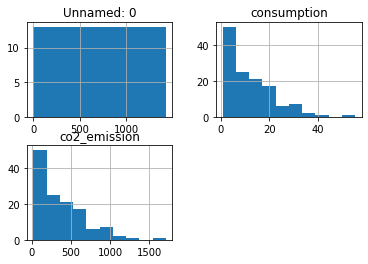

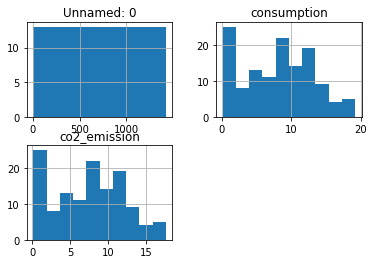

In [17]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby("food_category")["co2_emission"].agg([np.var,np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs'].hist()
# Show plot
plt.show()

In [19]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
